# Embed a trivial 3 dimensional dataset to 2 dimensions

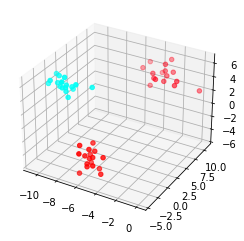

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3, n_features=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='hsv')

plt.show()

Epoch 1/5
Total loss: 6673.24951171875
Epoch 2/5
Total loss: 927.7943115234375
Epoch 3/5
Total loss: 588.9640502929688
Epoch 4/5
Total loss: 499.0426940917969
Epoch 5/5
Total loss: 494.51739501953125


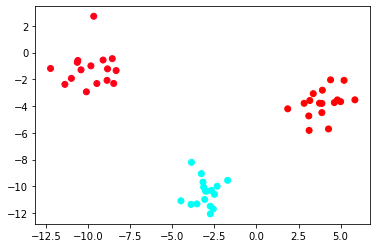

In [2]:
from simsep import EmbeddingPipeline, CosimilarityMatrix
from numpy.linalg import norm
from keras import Sequential
from keras.layers import Dense

X_d = {i: row for i, row in zip(range(len(X)), X)}
matrix = CosimilarityMatrix(lambda a, b: norm(a - b), X_d)

model = Sequential()
model.add(Dense(10))
model.add(Dense(2))

pipeline = EmbeddingPipeline(model, 2, epochs=5).train(X_d, matrix)

X_pred = pipeline.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=y, cmap='hsv')

plt.show()
